# Iowa State Salaries 2017

This visualization shows Iowa public sector salaries in 2017. The data are split between males and females. In both cases the highest concentration of workers occurs between around $50k and $80k. The numbers drop off above $100k. The histograms indicate a higher number of female workers than male. 

In [2]:
import seaborn as sns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
sal = pd.read_csv('C://Users//fergu//State_of_Iowa_Salary_Book.csv')
sal2 = sal[sal['Fiscal Year'] == 2017]
sal3 = sal2[['Gender', 'Base Salary', 'Total Salary Paid']]
sal3.columns = ['gender', 'base_sal', 'total_sal']
#sal3['total_sal'].find('$')
#sal3['raw_sal'] = sal3[['total_sal'][1:]]
print(sal3.head())

       gender     base_sal  total_sal
594250      F  1,786.40 BW  $36901.57
594281      M  1,241.60 BW  $13406.40
594343      F  1,424.80 BW  $36393.60
594589      F  2,648.80 BW  $63864.80
595298      M    36,566.00  $35233.34


In [4]:
print(sal3.head())

       gender     base_sal  total_sal
594250      F  1,786.40 BW  $36901.57
594281      M  1,241.60 BW  $13406.40
594343      F  1,424.80 BW  $36393.60
594589      F  2,648.80 BW  $63864.80
595298      M    36,566.00  $35233.34


In [5]:
def remove_dol_sign(yr_list):
    for i in range(0, len(yr_list)):
        if yr_list[i][0] == '$':
            #return 'Correct'
            yr_list[i] = yr_list[i][1:] #== yr_list[i][0]
        else:
   #         return 'Wrong'
            yr_list[i] = yr_list[i][:]
    return yr_list

In [6]:
raw_sal_l = list(sal3['total_sal'])
raw_sal_v = remove_dol_sign(raw_sal_l)

In [7]:
sal3['sal_val'] = raw_sal_v

C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
def to_float(y):
    list_final = []
    for i in range(len(y)):
        list_final.append(float(y[i]))
    return list_final       

In [9]:
raw_sal_float = to_float(raw_sal_v)
raw_sal_float = to_float(raw_sal_v)
sal3['raw_sal_num'] = raw_sal_float
sal3['raw_sal_test'] = sal3['raw_sal_num'] + 3
del sal3['raw_sal_test']
#print(max(sal3['raw_sal_num']))


C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
sal4 = sal3[sal3['raw_sal_num'] < 500000]
sal_male = sal4[sal4['gender'] == 'M']
sal_female = sal4[sal4['gender'] == 'F']
print(len(sal_male))
print(len(sal_female))
print(sal_male.head())
print(sal_female.head())

26159
33154
       gender     base_sal  total_sal   sal_val  raw_sal_num
594281      M  1,241.60 BW  $13406.40  13406.40     13406.40
595298      M    36,566.00  $35233.34  35233.34     35233.34
595420      M    42,500.00  $49564.00  49564.00     49564.00
595760      M  1,545.60 BW  $39206.96  39206.96     39206.96
596994      M   TERMINATED  $28513.05  28513.05     28513.05
       gender     base_sal  total_sal   sal_val  raw_sal_num
594250      F  1,786.40 BW  $36901.57  36901.57     36901.57
594343      F  1,424.80 BW  $36393.60  36393.60     36393.60
594589      F  2,648.80 BW  $63864.80  63864.80     63864.80
596006      F  3,098.40 BW  $78868.40  78868.40     78868.40
596037      F  2,289.60 BW  $58071.68  58071.68     58071.68


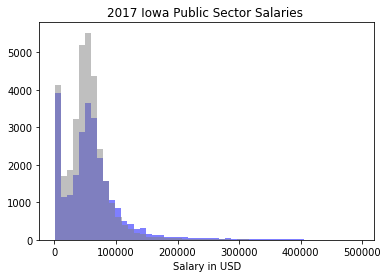

In [11]:
plt.hist(sal_male['raw_sal_num'], bins=50, color='blue', alpha=0.5)
plt.hist(sal_female['raw_sal_num'], bins=50, color='gray', alpha=0.5)
plt.title('2017 Iowa Public Sector Salaries ')
plt.xlabel('Salary in USD')

plt.show()

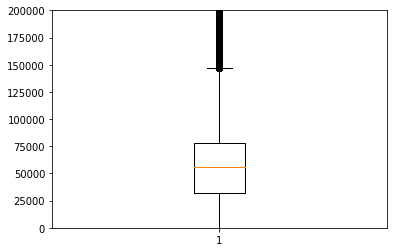

In [25]:
x = sal_male.reset_index()
#print(x)
#print(sal_male['raw_sal_num'].values)
plt.boxplot(sal_male['raw_sal_num'].values)
plt.ylim(0,200000)
plt.show()